In [22]:

import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np




range_ = np.zeros((32, 2))
count = 0
for k in range(100):
    if k <10:
        zeros = "000"
    else:
        zeros = "00"


    if k%10 != 0:
        filename = zeros + str(k) + ".tif"
        img_path = (r'E:\\comp\\train\images\\')+filename
        label_path = (r'E:\\comp\\train\labels\\')+filename
        img_img = skimage.io.imread(img_path)

        
        count = count + 1
        for j in range(32):
            range_[j][0] = img_img[:,:,j].min() + range_[j][0]
            range_[j][1] = img_img[:,:,j].max() + range_[j][1]
            #print(img_img[:,:,j].min(), end=' ')
        
    else:
        continue


range_ = range_/(count)
range_

array([[391.57777778, 764.2       ],
       [439.33333333, 950.35555556],
       [398.33333333, 970.37777778],
       [323.42222222, 918.28888889],
       [331.41111111, 953.3       ],
       [366.68888889, 998.25555556],
       [284.36666667, 967.        ],
       [278.93333333, 973.51111111],
       [265.97777778, 980.18888889],
       [275.58888889, 994.98888889],
       [171.87777778, 780.98888889],
       [145.51111111, 794.47777778],
       [138.64444444, 844.26666667],
       [138.78888889, 854.87777778],
       [143.26666667, 820.54444444],
       [176.4       , 881.01111111],
       [138.06666667, 703.61111111],
       [129.41111111, 638.92222222],
       [157.84444444, 818.91111111],
       [128.73333333, 597.47777778],
       [167.15555556, 849.63333333],
       [171.32222222, 857.44444444],
       [170.41111111, 796.03333333],
       [177.92222222, 668.67777778],
       [145.3       , 591.9       ],
       [144.54444444, 625.76666667],
       [131.11111111, 579.78888889],
 

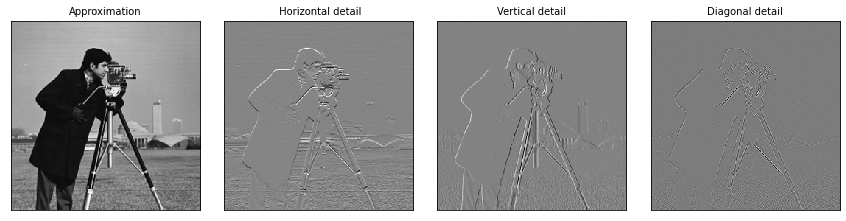

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [27]:
original

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [1]:

import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np

 
img_img = skimage.io.imread(r'E:\comp\train\images\0064.tif')
img_label = skimage.io.imread(r'E:\comp\train\labels\0064.tif')
# skimage.io.imshow(img[:,:,1])
# plt.show()



In [2]:
original = img_img[:,:,1]

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

NameError: name 'pywt' is not defined

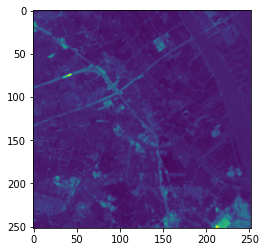

In [53]:
plt.imshow(LL)

In [3]:
from scipy.signal import wiener
import cv2

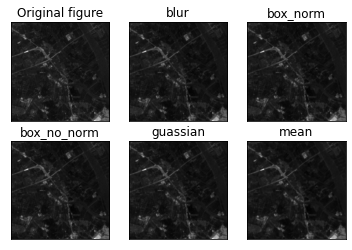

In [30]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
 
 
img = img_img[:,:,1]
 
blur = cv2.blur(img, (3, 3))
# 方框滤波（归一化）=均值滤波
box1 = cv2.boxFilter(img, -1, (3, 3), normalize=True)
# 方框滤波（不归一化）
box2 = cv2.boxFilter(img, -1, (3, 3), normalize=False)
# 高斯滤波
# 用5*5的核进行卷积操作，但核上离中心像素近的参数大。
guassian = cv2.GaussianBlur(img, (5, 5), 1)
# 中值滤波
# 将某像素点周围5*5的像素点提取出来，排序，取中值写入此像素点。
mean = cv2.medianBlur(img, 5)

# 展示效果
titles = ['Original figure', 'blur', 'box_norm', 'box_no_norm', 'guassian', 'mean']
images = [img, blur, box1, box2, guassian, mean]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


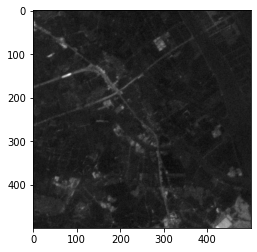

In [74]:
plt.imshow(img_img[:,:,0], cmap=plt.cm.gray)

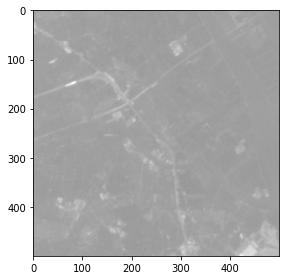

In [72]:
skimage.io.imshow(img_wiener)


In [8]:
import math
def psnr(img1, img2):
   mse = np.mean( (img1/255. - img2/255.) ** 2 )
   if mse < 1.0e-10:
      return 100
   PIXEL_MAX = 1
   return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


In [21]:
for i in images:
    print(psnr(img, i))

100
32.09308891101264
32.09308891101264
-25.08657678633177
32.03210779366082
29.23730423531905


In [36]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = img_img[:,:,1]

img2 = denoise_wavelet(original ,wavelet="db8",mode='hard')

print(psnr(img, img2))


-7.026171762158667


In [25]:
print(psnr(img, img2))

-7.026171755519575


In [9]:
import cv2

from osgeo import gdal

#定义图像打开方法
def image_open(image):
    dataset = gdal.Open(image)
    if dataset == "None":
       print("无法打开数据")
    return dataset

FilePath = r'E:\comp\train\images\0064.tif'
data = image_open(FilePath)

Projection = data.GetProjection()
Transform = data.GetGeoTransform()

#按照np方式读取图像
X = data.RasterXSize
Y = data.RasterYSize
DataArray = data.ReadAsArray(0, 0, X, Y)
bands, height, width = DataArray.shape
print(X,Y,bands, width, height)

#高斯滤波过程，滤波核大小为3×3
GS = cv2.GaussianBlur(DataArray, (3, 3), 0)

#构建输出数据集
def drive(result):
    output1 = gdal.GetDriverByName("GTiff")
    output2 = output1.Create("GS3.tif", width, height, bands, gdal.GDT_Int16)
    output2.SetProjection(Projection)
    output2.SetGeoTransform(Transform)
    for i in range(bands):
        output3 = output2.GetRasterBand(i+1)
        output3.WriteArray(result)

#运行函数，输出特征
for i in range(bands):
    drive(GS[i])

ImportError: cannot import name 'gdal' from 'osgeo' (D:\Anaconda3\lib\site-packages\osgeo\__init__.py)